In [55]:
import gpxpy
import gpxpy.gpx
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from folium.vector_layers import Rectangle
from shapely.geometry import LineString

In [81]:
import numpy as np
import gpxpy

gpx_file = open('/Users/ashwin/Desktop/other gpx/fa5e30b2-4a10-4831-8074-ce4720b6c181_767.gpx', 'r')
gpx = gpxpy.parse(gpx_file)
qt1 = []

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            qt1.append((point.latitude, point.longitude))

observations_array = np.array(qt1)
print(len(observations_array))

# print(observations_array)
qt1 = observations_array[:50]
qt2 = observations_array[42:100]
# print(qt1)
print(qt2)

237
[[13.0128663 77.6639088]
 [13.0129157 77.6637548]
 [13.0129638 77.6636247]
 [13.0129911 77.6635002]
 [13.0130136 77.6633747]
 [13.0130405 77.6632703]
 [13.0130655 77.6631528]
 [13.0130827 77.6630369]
 [13.0130884 77.6629749]
 [13.0131062 77.6629061]
 [13.0131155 77.6628186]
 [13.013118  77.6627318]
 [13.0131214 77.6626668]
 [13.0131332 77.6626209]
 [13.013135  77.6626217]
 [13.0131333 77.6626201]
 [13.0131299 77.6626299]
 [13.01313   77.66263  ]
 [13.01313   77.66263  ]
 [13.01313   77.66263  ]
 [13.013151  77.6625876]
 [13.0131568 77.6625729]
 [13.0131707 77.6625156]
 [13.0131841 77.6624232]
 [13.0131986 77.6623341]
 [13.0132212 77.6622487]
 [13.0132423 77.6621702]
 [13.0132564 77.6621081]
 [13.0132656 77.6620459]
 [13.0132785 77.6620095]
 [13.0132873 77.6619973]
 [13.013311  77.6619453]
 [13.0133326 77.661857 ]
 [13.0133601 77.6617692]
 [13.0133884 77.6616778]
 [13.0134199 77.66159  ]
 [13.0134533 77.6614697]
 [13.0134811 77.6613822]
 [13.0135022 77.6612665]
 [13.0135118 77.66121

In [57]:
import folium
from gpxpy import parse

gpx_file1 = open('/Users/ashwin/Desktop/other gpx/fa5e30b2-4a10-4831-8074-ce4720b6c181_767.gpx', 'r')
gpx = parse(gpx_file1)

map_center1 = [gpx.tracks[0].segments[0].points[0].latitude, gpx.tracks[0].segments[0].points[0].longitude]
mymap1 = folium.Map(location=map_center1, zoom_start=12)

for track in gpx.tracks:
    for segment in track.segments:
        lat_lon_pairs1 = [(point.latitude, point.longitude) for point in segment.points[:150]]  
        folium.PolyLine(lat_lon_pairs1, color="blue", weight=2.5, opacity=1).add_to(mymap1)

mymap1

In [92]:
all_points1 = []
for track in gpx.tracks:
    for segment in track.segments:
        # all_points1.extend([(point.longitude, point.latitude) for point in segment.points[:50]]) 
        all_points1.extend([(point.longitude, point.latitude) for point in segment.points[42:100]]) 

route_line1 = LineString(all_points1)
buffer_distance1 = 0.005  
route_buffer1 = route_line1.buffer(buffer_distance1)
map_center1 = route_line1.centroid.coords[0][::-1] 
mymap1 = folium.Map(location=map_center1, zoom_start=14)
lat_lon_pairs1 = [(point[1], point[0]) for point in route_line1.coords]
folium.PolyLine(lat_lon_pairs1, color="blue", weight=2.5, opacity=1).add_to(mymap1)
route_buffer_geojson1 = route_buffer1.__geo_interface__
folium.GeoJson(route_buffer_geojson1, name='geofence').add_to(mymap1)
mymap1

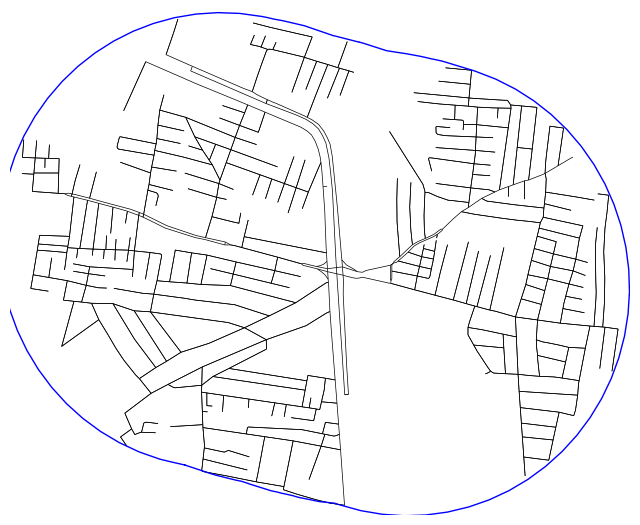

In [93]:
import osmnx as ox
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
route_polygon1 = route_buffer1.convex_hull
G1 = ox.graph_from_polygon(route_polygon1, network_type='drive')
fig1, ax1 = ox.plot_graph(G1, bgcolor='w', edge_color='k', edge_linewidth=0.5, node_size=0, show=False, close=False)
route_line_buffer1 = route_line1.buffer(0.005)  
ax1.plot(*route_line_buffer1.exterior.xy, color='blue', linewidth=1)
ax1.plot(*route_line_buffer1.exterior.xy[42:100], color='blue', linewidth=1)
plt.show()


In [94]:
import osmnx as ox
import numpy as np
from shapely.geometry import LineString
route_polygon1 = route_buffer1.convex_hull
G1 = ox.graph_from_polygon(route_polygon1, network_type='drive')
states1 = np.array([(data1['y'], data1['x']) for node, data1 in G1.nodes(data=True)])
print("Number of nodes:", len(states1))
print("Node coordinates:")
for node in states1:
    print(node)

Number of nodes: 453
Node coordinates:
[13.0101198 77.6575349]
[13.0139737 77.6593535]
[13.0144883 77.657959 ]
[13.0123529 77.6621574]
[13.0111341 77.6592786]
[13.0105556 77.6581272]
[13.0109537 77.6577829]
[13.01128   77.6575148]
[13.0115422 77.6573353]
[13.0121728 77.6569486]
[13.0125333 77.6567835]
[13.0118287 77.6571633]
[13.0108788 77.6578621]
[13.011457  77.6588011]
[13.0125451 77.6613876]
[13.011733  77.6607223]
[13.0119956 77.6602318]
[13.0123445 77.6581118]
[13.011121 77.658233]
[13.0125248 77.6572656]
[13.0112583 77.6584758]
[13.012368  77.6577448]
[13.0130279 77.6582599]
[13.012256  77.6607896]
[13.0127329 77.6581873]
[13.012861 77.657288]
[13.012922  77.6599152]
[13.0129453 77.6592495]
[13.0135909 77.6593875]
[13.0131182 77.6614977]
[13.0136829 77.6577505]
[13.0132754 77.6577201]
[13.0167747 77.6583224]
[13.0160174 77.6605042]
[13.0161743 77.6600223]
[13.0151615 77.6596544]
[13.0155248 77.6581386]
[13.0151412 77.6580798]
[13.0158901 77.658207 ]
[13.0152384 77.6596785]
[13.0

In [95]:
# import numpy as np
# from math import exp, sqrt, pi

# pairwise_distances = []
# for i in range(len(qt1) - 1):
#     x1, y1 = qt1[i]
#     x2, y2 = qt1[i + 1]
#     distance = sqrt((x2 - x1)**2 + (y2 - y1)**2)
#     pairwise_distances.append(distance)
# TRANS = np.zeros((len(states1), len(states1), len(qt1)-1))

# beta = 0.95  

# n = len(states1)
# for k in range(len(qt1)-1):
#     for i in range(n):
#         for j in range(n):
#             xtemp = np.linalg.norm(states1[i] - states1[j])
#             dij = abs(xtemp - pairwise_distances[k])
#             TRANS[i, j, k] = (1 / beta) * exp(-dij / beta)
#         TRANS[i, :, k] = TRANS[i, :, k] / np.sum(TRANS[i, :, k])

# sigztemp = []
# for i in range(len(qt1)):
#     for j in range(len(states1)):
#         sigztemp.append(np.linalg.norm(qt1[i] - states1[j]))
# sigz = 1.4 * np.median(sigztemp)

# EMIS = np.zeros((len(states1), len(qt1)))
# for i in range(len(qt1)):
#     for j in range(len(states1)):
#         EMIS[j, i] = (1 / (sqrt(2 * pi) * sigz)) * exp(-0.5 * ((np.linalg.norm(qt1[i] - states1[j])) / sigz) ** 2)

# # seq = [1, 2, 3, 4]
# seq = np.arange(1, len(qt1)+1)

# PRIOR = np.array([(1 / len(states1))] * len(states1))
# # PRIOR[358] = 0.7

# T = len(seq)  # Number of observations
# n = EMIS.shape[0]  # Number of states

# score = np.zeros((n, T))
# pred = np.zeros((n, T))

# for i in range(n):
#     score[i, 0] = PRIOR[i] * EMIS[i, seq[0] - 1]

# for t in range(1, T):
#     for j in range(n):
#         tscore = np.zeros(n)
#         for k in range(n):
#             tscore[k] = score[k, t - 1] * TRANS[k, j, t - 1] * EMIS[j, seq[t] - 1]
#         score[j, t] = np.max(tscore)
#         id = np.where(tscore == np.max(tscore))[0][0]
#         pred[j, t] = id

# IT1 = np.zeros(T, dtype=int)
# IT1[-1] = np.argmax(score[:, -1])

# for t in range(T - 1, 0, -1):
#     IT1[t - 1] = int(pred[IT1[t], t])

# print(IT1)

import numpy as np
from math import exp, sqrt, pi

pairwise_distances2 = []
for i in range(len(qt2) - 1):
    x1, y1 = qt2[i]
    x2, y2 = qt2[i + 1]
    distance = sqrt((x2 - x1)**2 + (y2 - y1)**2)
    pairwise_distances2.append(distance)
TRANS2 = np.zeros((len(states1), len(states1), len(qt2)-1))

beta = 0.95  

n2 = len(states1)
for k in range(len(qt2)-1):
    for i in range(n2):
        for j in range(n2):
            xtemp2 = np.linalg.norm(states1[i] - states1[j])
            dij2 = abs(xtemp2 - pairwise_distances2[k])
            TRANS2[i, j, k] = (1 / beta) * exp(-dij2 / beta)
        TRANS2[i, :, k] = TRANS2[i, :, k] / np.sum(TRANS2[i, :, k])

sigztemp2 = []
for i in range(len(qt2)):
    for j in range(len(states1)):
        sigztemp2.append(np.linalg.norm(qt2[i] - states1[j]))
sigz2 = 1.4 * np.median(sigztemp2)

EMIS2 = np.zeros((len(states1), len(qt2)))
for i in range(len(qt2)):
    for j in range(len(states1)):
        EMIS2[j, i] = (1 / (sqrt(2 * pi) * sigz2)) * exp(-0.5 * ((np.linalg.norm(qt2[i] - states1[j])) / sigz2) ** 2)

# seq = [1, 2, 3, 4]
seq2 = np.arange(1, len(qt2)+1)

PRIOR2 = np.array([(1 / len(states1))] * len(states1))
# PRIOR[358] = 0.7

T2 = len(seq2)  # Number of observations
n2 = EMIS2.shape[0]  # Number of states

score2 = np.zeros((n2, T2))
pred2 = np.zeros((n2, T2))

for i in range(n2):
    score2[i, 0] = PRIOR2[i] * EMIS2[i, seq2[0] - 1]

for t in range(1, T2):
    for j in range(n2):
        tscore2 = np.zeros(n2)
        for k in range(n2):
            tscore2[k] = score2[k, t - 1] * TRANS2[k, j, t - 1] * EMIS2[j, seq2[t] - 1]
        score2[j, t] = np.max(tscore2)
        id2 = np.where(tscore2 == np.max(tscore2))[0][0]
        pred2[j, t] = id2

IT2 = np.zeros(T2, dtype=int)
IT2[-1] = np.argmax(score2[:, -1])

for t in range(T2 - 1, 0, -1):
    IT2[t - 1] = int(pred2[IT2[t], t])

print(IT2)

[205  68 442  68 442  68 442 258 258 258 258 258 258 258 258 258 258 258
 258 258 443 443 443 443 443 445 444 445 444 444 444 341 163 163 340 340
 340 340 124 124 124 124 124 124 124 124 124 124 392 392 392 392 392 392
 268 268 364 364]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


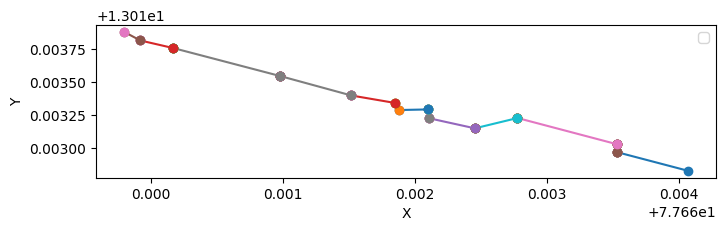

In [96]:
# import networkx as nx
# import matplotlib.pyplot as plt

# def display_shortest_paths(paths, states):
#     fig, ax = plt.subplots(figsize=(8, 8))  # Adjust figure size for better visualization
#     for i, path in enumerate(paths):
#         path_coordinates = [states[i] for i in path]
#         x, y = zip(*path_coordinates)
#         ax.plot(y, x, marker='o')  # Plot each path separately with a label
#     ax.set_aspect('equal')
#     ax.set_xlabel('X')
#     ax.set_ylabel('Y')
#     ax.legend()  # Show legend to differentiate between paths
#     plt.show()

# G2 = nx.Graph()
# for i in range(len(IT1) - 1):
#     G2.add_edge(IT1[i], IT1[i + 1])
# shortest_paths = [nx.shortest_path(G2, IT1[i], IT1[i + 1]) for i in range(len(IT1) - 1)]

# # Display the shortest paths
# display_shortest_paths(shortest_paths, states1)

import networkx as nx
import matplotlib.pyplot as plt

def display_shortest_paths(paths, states):
    fig, ax = plt.subplots(figsize=(8, 8))  # Adjust figure size for better visualization
    for i, path in enumerate(paths):
        path_coordinates = [states[i] for i in path]
        x, y = zip(*path_coordinates)
        ax.plot(y, x, marker='o')  # Plot each path separately with a label
    ax.set_aspect('equal')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()  # Show legend to differentiate between paths
    plt.show()

G2 = nx.Graph()
for i in range(len(IT2) - 1):
    G2.add_edge(IT2[i], IT2[i + 1])
shortest_paths = [nx.shortest_path(G2, IT2[i], IT2[i + 1]) for i in range(len(IT2) - 1)]

# Display the shortest paths
display_shortest_paths(shortest_paths, states1)



In [97]:
import folium

def display_shortest_paths_on_map(paths, states):
    center_lat = sum(coord[0] for coord in states) / len(states)
    center_lon = sum(coord[1] for coord in states) / len(states)
    m = folium.Map(location=[center_lat, center_lon], zoom_start=10)
    for i, path in enumerate(paths):
        path_coordinates = [states[node] for node in path]
        folium.PolyLine(locations=path_coordinates).add_to(m)
    return m
map_with_paths = display_shortest_paths_on_map(shortest_paths, states1)
map_with_paths